## 1. Verify GPU Availability

In [ ]:
!nvidia-smi

Sun Apr 20 13:34:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             11W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 2. Install Ultralytics YOLO Library

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

## 3. Sanity Check Ultralytics Installation

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.139 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


## 4. Import YOLO API & Display Utilities

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

## 5. Install Roboflow SDK & Download Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="ZkNMlNnyIa2y7w8zGWMS")
project = rf.workspace("yolo-do-it-yhopz").project("helmet-detector-9rzmg-bmd6q")
version = project.version(1)
dataset = version.download("yolov11")
dataset.location

loading Roboflow workspace...
loading Roboflow project...


## 6. Train YOLOv11‑Nano on Helmet Detector

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=50 imgsz=640

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Helmet-Detector-1/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, 

## 7. Visualize Confusion Matrix

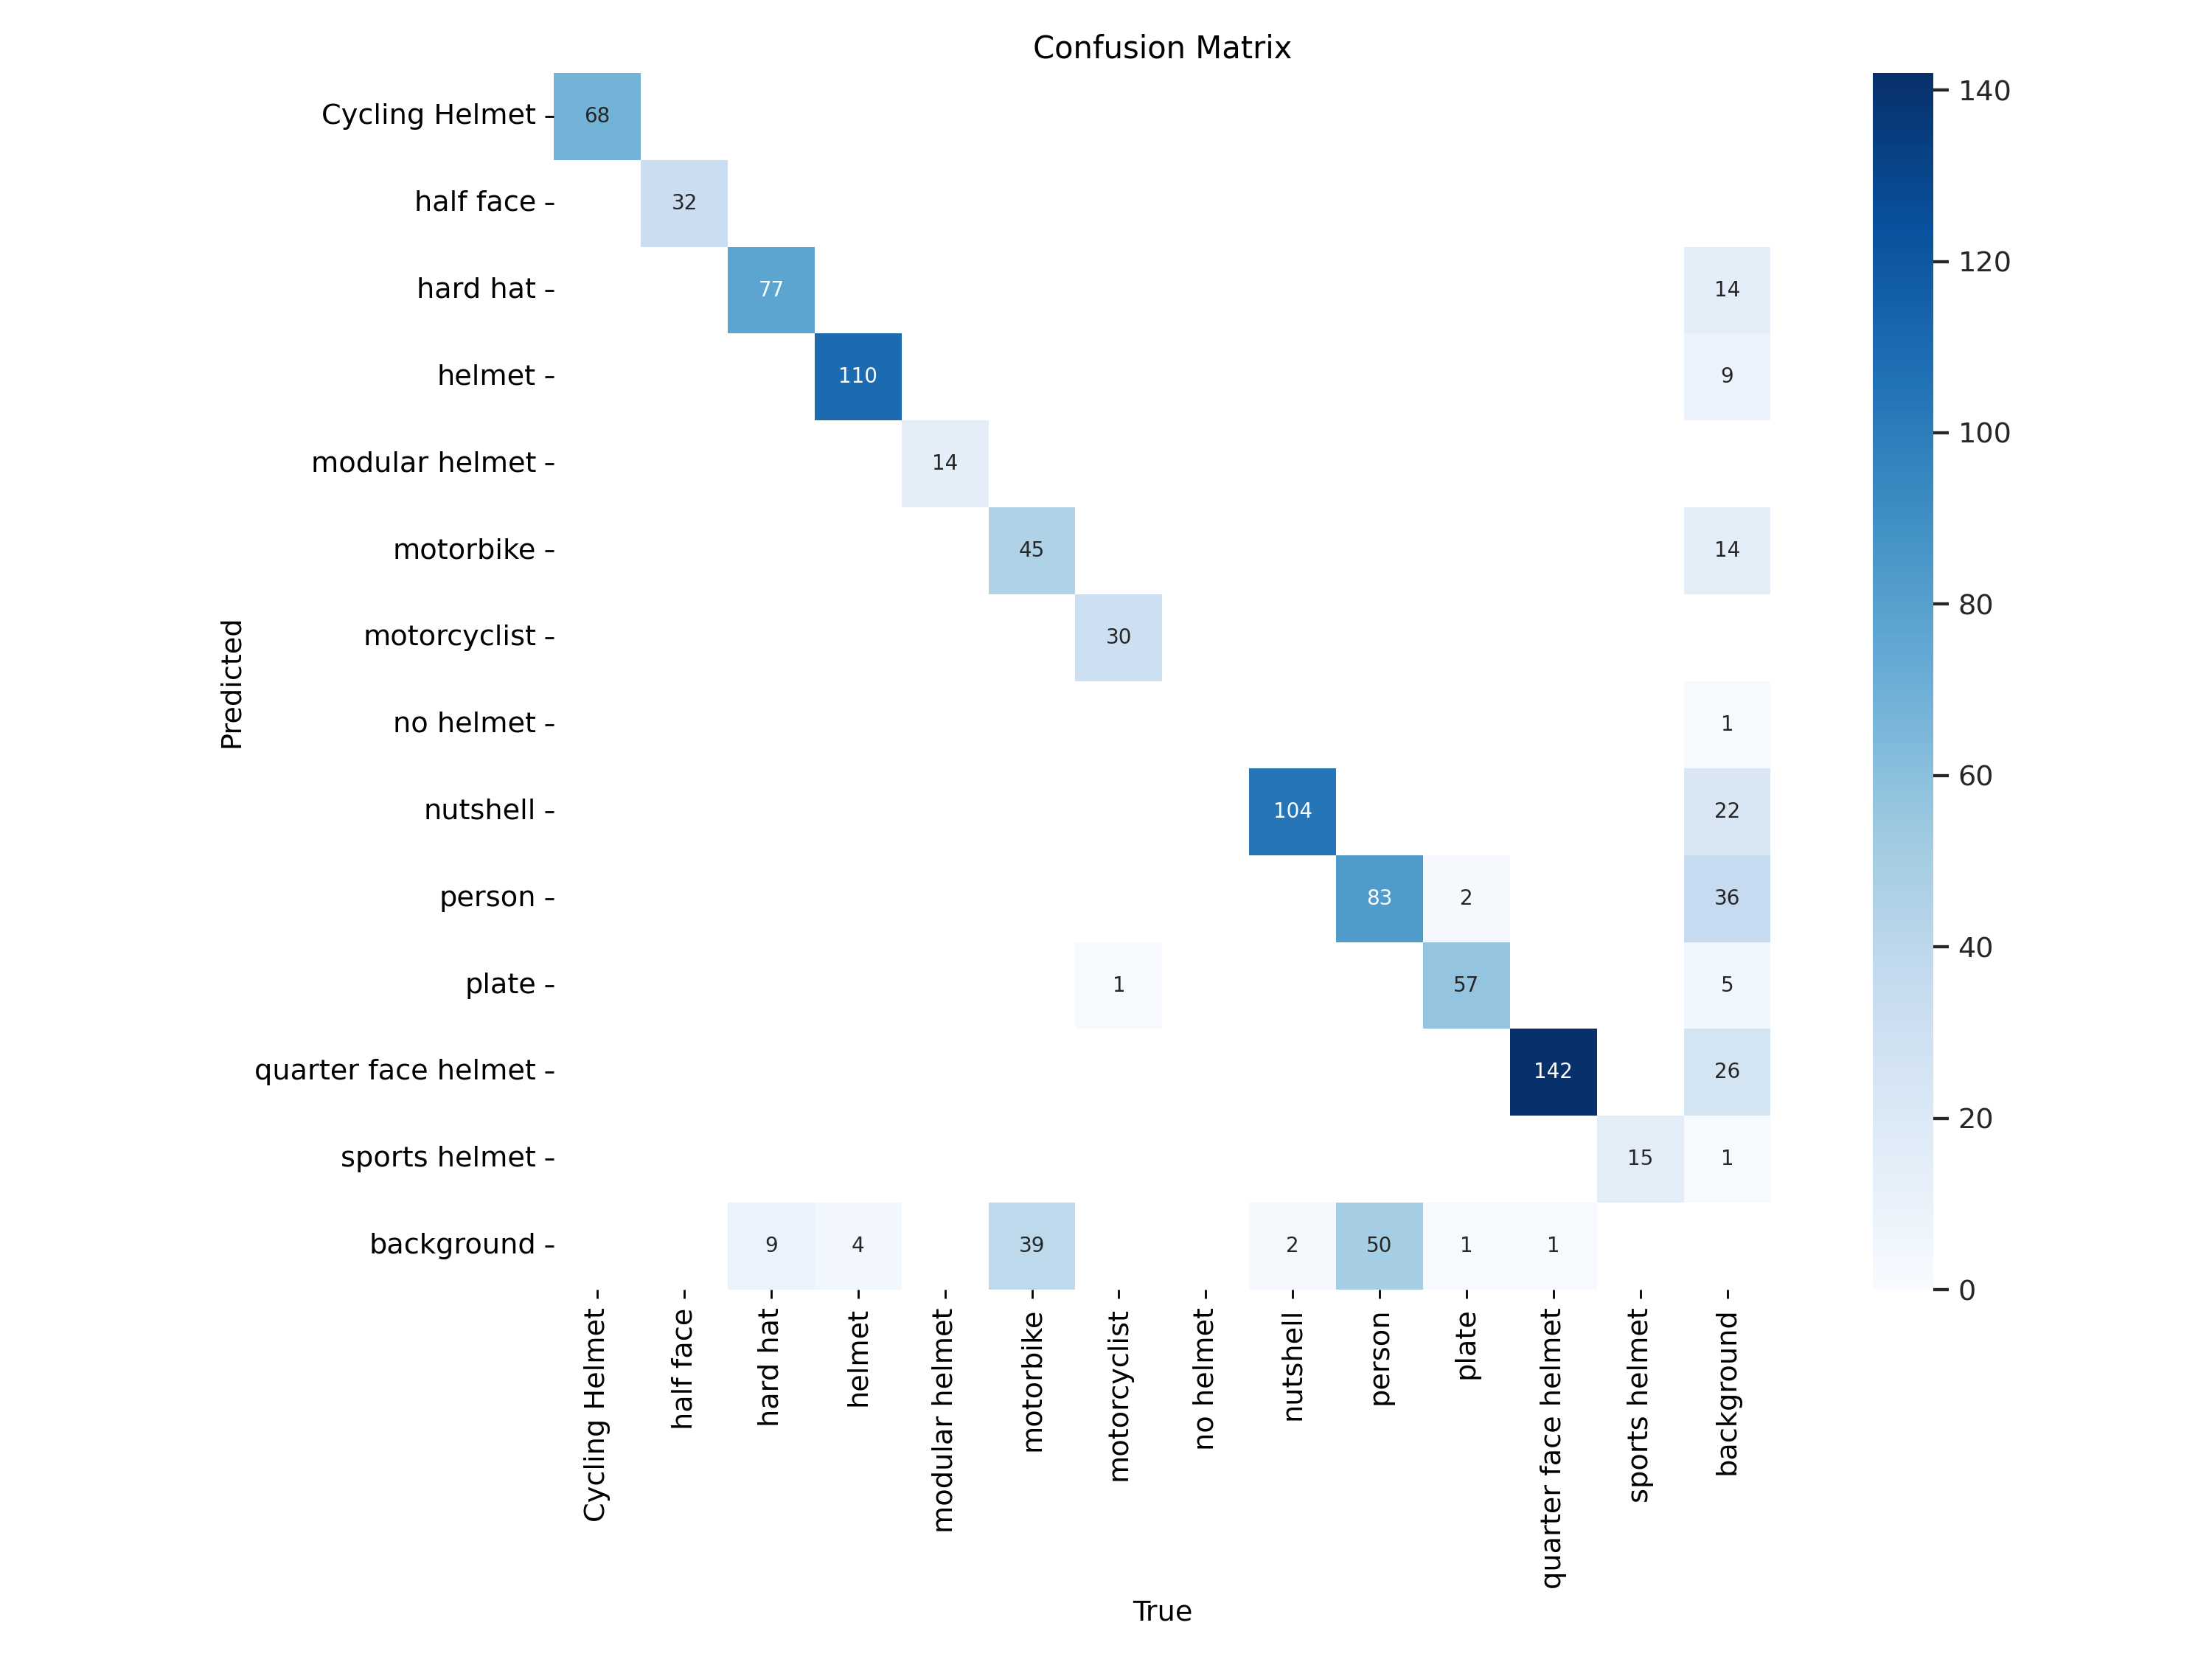

In [ ]:
Image("/content/runs/detect/train2/confusion_matrix.png", width=600)

## 8. Visualize Class Label Distribution

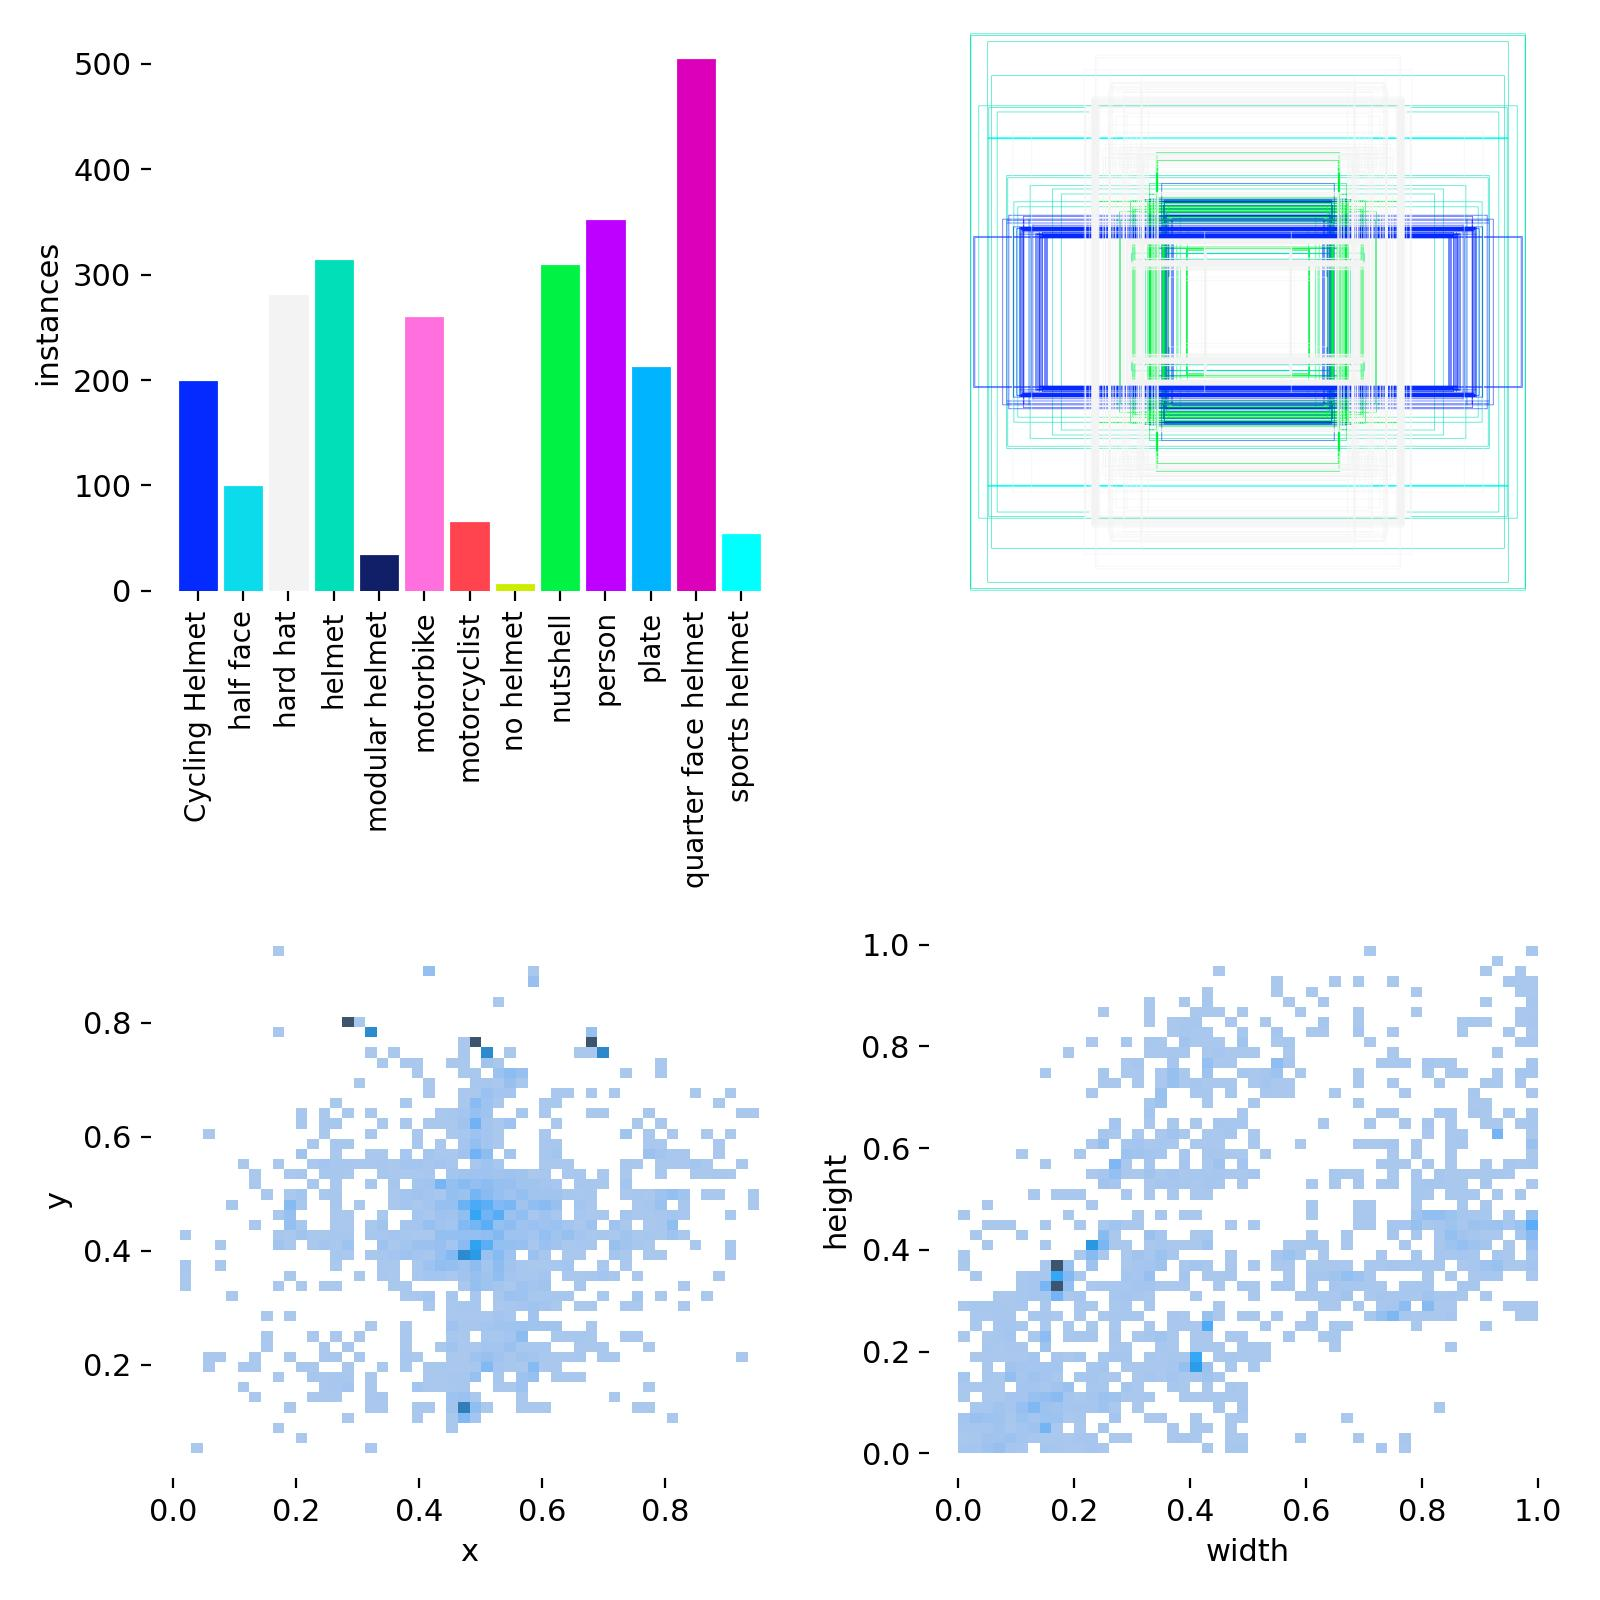

In [ ]:
Image("/content/runs/detect/train2/labels.jpg", width=600)

## 9. Visualize Loss & mAP Curves

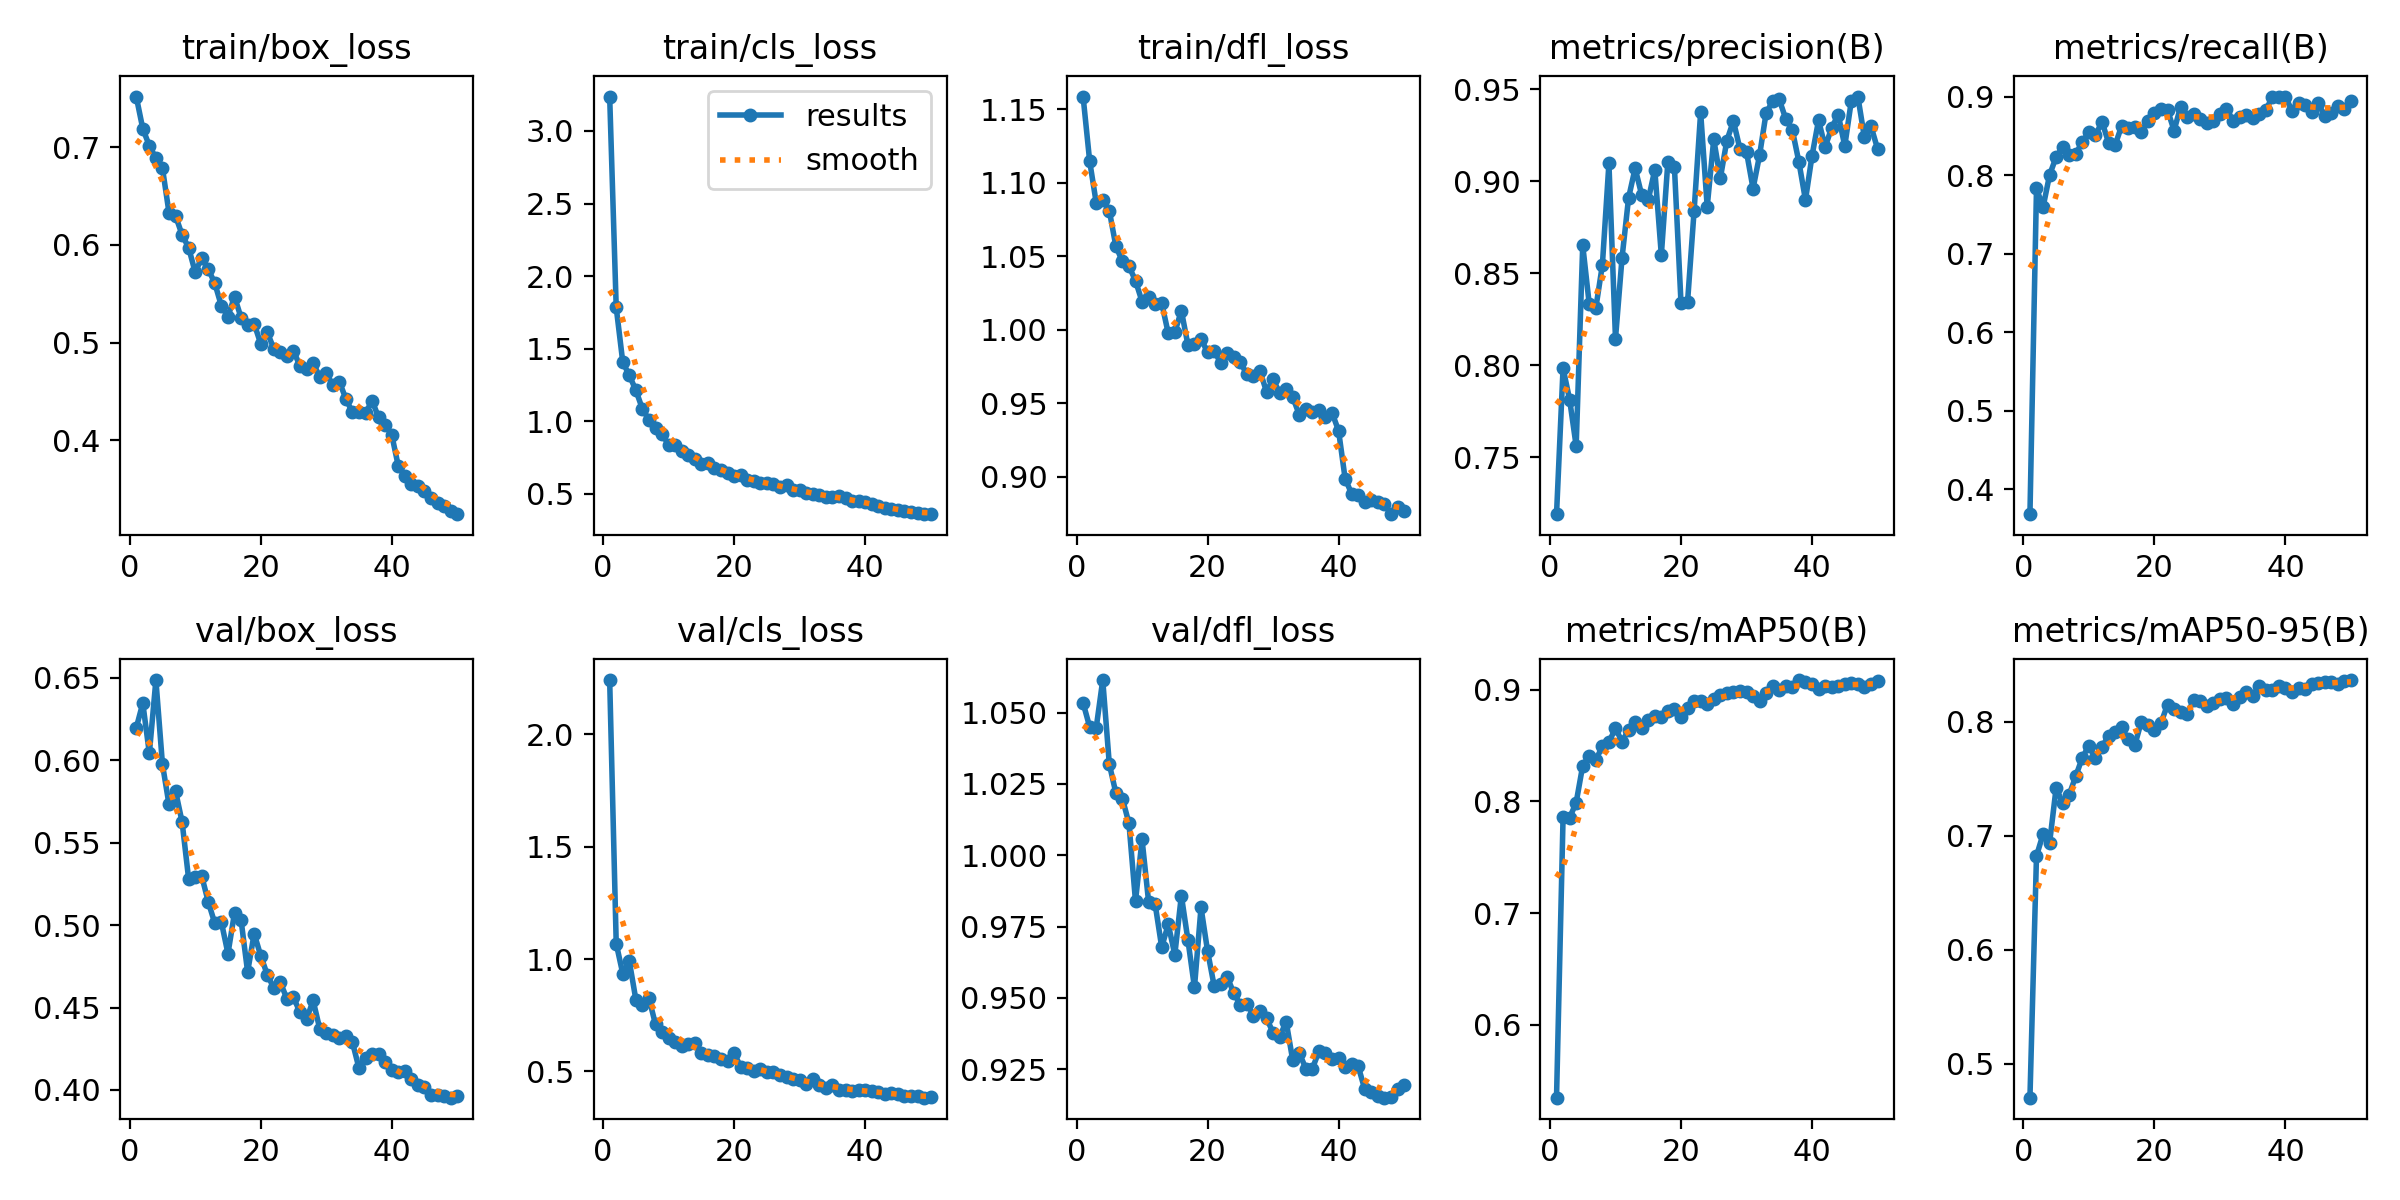

In [ ]:
Image("/content/runs/detect/train2/results.png", width=600)

## 10. Preview First Augmented Training Batch

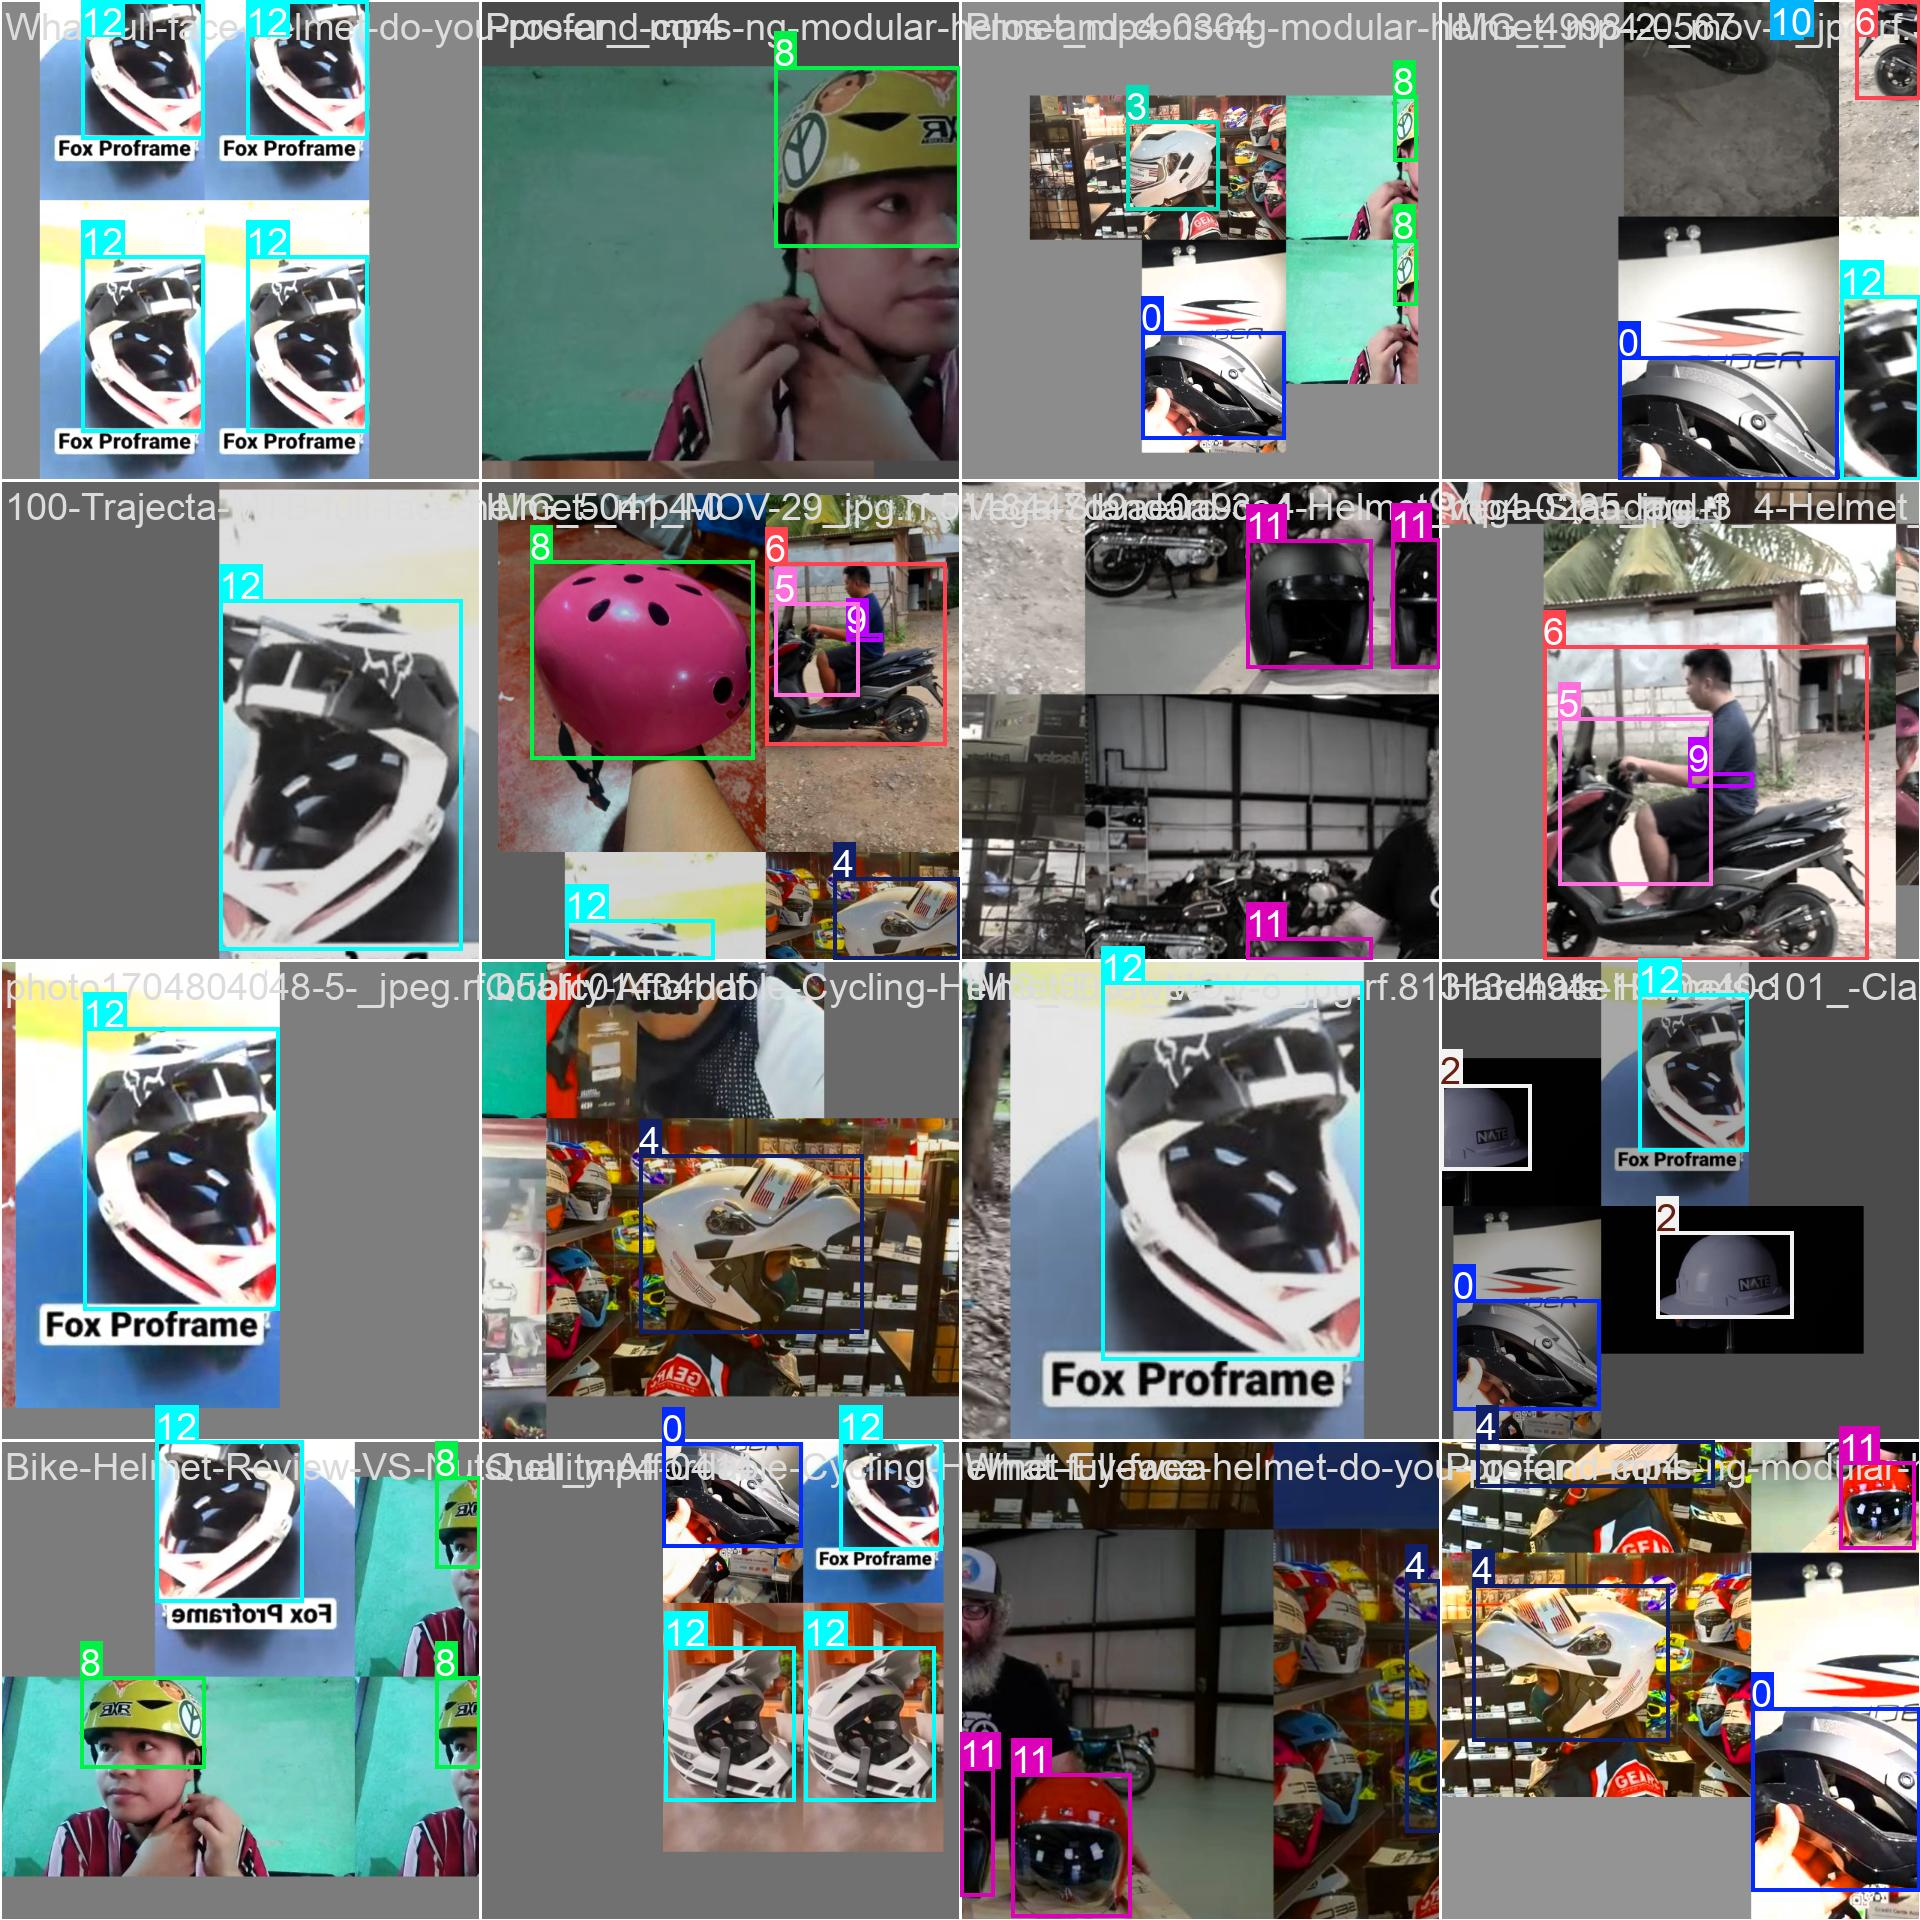

In [ ]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=600)

## 11. Inference on Test Set

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,584,687 parameters, 0 gradients, 6.3 GFLOPs

image 1/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0178_jpg.rf.40daedd08d8ee073d606a4e59773f75d.jpg: 640x384 1 sports helmet, 47.3ms
image 2/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0179_jpg.rf.53fbc18ec2d3dbc33fa2ca90fe4d27f6.jpg: 640x384 1 sports helmet, 9.0ms
image 3/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0186_jpg.rf.4b0cfc853a5cddb12cc069cd568ee13f.jpg: 640x384 1 sports helmet, 8.6ms
image 4/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0199_jpg.rf.ab2c103b611fa0377e8d8833d0d99e72.jpg: 640x384 1 sports helmet, 8.2ms
image 5/568 /content/Helmet-Detector-1/test/images/100-Trajecta-MTB-full-face-helmet-_mp4-0202_jpg.rf.ff6838cf4838f7bbf9cd1d75488bceaf.jpg: 640x384 

## 12. Inference on Custom Image

In [ ]:
import requests
from ultralytics import YOLO
import os

# Assuming your trained model is saved at this path
model_path = "/content/drive/MyDrive/best.pt"
model = YOLO(model_path)

def detect_from_url(image_url, confidence_threshold=0.25):
    """
    Downloads an image from a URL and performs object detection using YOLO.

    Args:
        image_url (str): The URL of the image.
        confidence_threshold (float): The confidence threshold for detections.
    """
    try:
        response = requests.get(image_url, stream=True)
        response.raise_for_status()

        image_filename = "downloaded_image.jpg"
        with open(image_filename, 'wb') as out_file:
            out_file.write(response.content)

        print(f"Downloaded image from {image_url} to {image_filename}")

        # Perform detection
        results = model.predict(
            source=image_filename,
            conf=confidence_threshold,
            save=True
        )

        print("Detection complete. Results saved in runs/detect/predict/")

        os.remove(image_filename)
        print(f"Removed temporary image: {image_filename}")

        from IPython.display import Image
        output_image_path = results[0].save_dir + '/' + os.path.basename(image_filename)
        display(Image(output_image_path))


    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
    except Exception as e:
        print(f"An error occurred during detection: {e}")

Downloaded image from https://www.shutterstock.com/image-photo/young-construction-worker-hard-hat-600nw-111236237.jpg to downloaded_image.jpg

image 1/1 /content/downloaded_image.jpg: 640x544 1 nutshell, 64.1ms
Speed: 3.8ms preprocess, 64.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 544)
Results saved to runs/detect/predict2
Detection complete. Results saved in runs/detect/predict/
Removed temporary image: downloaded_image.jpg


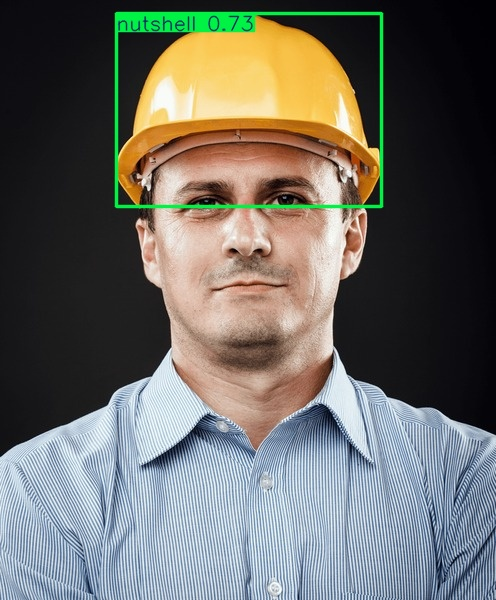

In [ ]:
detect_from_url("https://www.shutterstock.com/image-photo/young-construction-worker-hard-hat-600nw-111236237.jpg")

## 13. Helmet Detection in Video using Trained YOLOv11 Model

In [ ]:
from ultralytics import YOLO
import os
import shutil
from pathlib import Path

# Load the trained YOLO model
model = YOLO("/content/drive/MyDrive/best.pt")

# Input and desired output path
input_video_path = "/content/drive/MyDrive/HelmetVideo/helmet_video_2.mp4"
output_video_path = "/content/drive/MyDrive/HelmetVideo/helmet_output_video_2.avi"  # Save with .avi

# Run helmet detection
results = model.predict(
    source=input_video_path,
    conf=0.25,
    save=True
)

# Get the path where the result is saved
predicted_video_dir = Path(results[0].save_dir)

# Because the saved video is in .avi format even if input was .mp4
predicted_video_name = Path(input_video_path).with_suffix('.avi').name
saved_video_path = predicted_video_dir / predicted_video_name

# Copy to your desired location
shutil.copy(str(saved_video_path), output_video_path)

print(f"[INFO] Helmet detection video saved at: {output_video_path}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 14. Real-Time Detection

In [ ]:
import cv2
from ultralytics import YOLO

# Load model (make sure best.pt is in the same folder)
model = YOLO("best_1.pt")

# Open webcam
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Detect helmets
    results = model(frame)

    # Annotate frame
    annotated_frame = results[0].plot()

    # Show frame
    cv2.imshow("Helmet Detection - Press 'q' to Quit", annotated_frame)

    # Quit when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()